<img src="autoencodeur_gans_page_de_garde.png" alt="Page de garde" style="display: block; margin-left: auto; margin-right: auto; width: 100%;" />

# AUTOENCODEURS / GANs - GENERATION ET RECONSTITUTION DE DONNEES
### Etude de cas : Machine Learning with Alzheimer dataset using GAN
**Source** : https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

# **Contexte**


La maladie d'Alzheimer est une maladie neurodégénérative progressive qui affecte la mémoire, la pensée et le comportement. Un diagnostic précoce et précis est crucial pour une prise en charge optimale et pour la recherche de traitements, étant donné l'absence actuelle de remède. Distinguer les stades de la maladie ou l'absence de démence est essentiel pour la recherche et l'amélioration de la qualité de vie des patients.

Ce projet utilise un dataset synthétique riche, conçu pour explorer les facteurs liés à l'Alzheimer et développer des modèles prédictifs. Il contient une variété de caractéristiques : démographiques, comportementales, cliniques et liées aux habitudes de vie. Cela inclut l'âge, les antécédents familiaux, le niveau d'éducation, le tabagisme, l'activité physique, l'alimentation, le sommeil, la tension artérielle, le cholestérol, ainsi que les scores d'évaluation cognitive (MMSE, ADL) et divers symptômes.

Chaque entrée dans le dataset représente un patient, décrit par ces caractéristiques. La variable cible est le diagnostic de la maladie d'Alzheimer, qui sera traitée comme une tâche de classification (présence ou absence de la maladie, ou ses différents stades).

L'objectif de ce projet est de développer des modèles de prédiction précis capables d'utiliser les caractéristiques fournies pour anticiper avec justesse le diagnostic de la maladie d'Alzheimer. Ces modèles pourraient potentiellement aider les professionnels de la santé à prendre des décisions éclairées, en identifiant rapidement les individus à risque ou ceux nécessitant une évaluation médicale approfondie. En conséquence, cela pourrait contribuer à améliorer la détection précoce de la maladie et la qualité de vie des patients affectés.

# **Problématique**



Face à la complexité et à la nature progressive de la maladie d'Alzheimer, un diagnostic précoce et précis reste un défi majeur. Les données cliniques et comportementales des patients étant multiples et hétérogènes, comment peut-on développer un modèle de Deep Learning capable d'extraire efficacement les informations pertinentes de ces nombreuses caractéristiques pour prédire de manière fiable le diagnostic d'Alzheimer, en s'appuyant sur une représentation de données plus compacte et optimisée ?

# **Analyse descriptive**

In [672]:
# Importation des librairies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as sk 

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn import metrics 

In [673]:
# Chargement du dataset
data = pd.read_csv("alzheimers_disease_data.csv", header=0)
# data = pd.read_csv("Students_Social_Media_Addiction.csv", header=0)

In [674]:
# Aperçu du dataset (affiche les 3 premières lignes)
data.head(5)

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0                   0  1.725883          0               0   
1                   0  2.592424          0               0   
2                   0  7.119548          0               1   
3                   1  6.481226          0               0   
4                   0  0.014691          0               0   

   PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  Diagnosis  \
0                   0                          1              0          0   
1                   0                          0              1          0   
2                   0                          1              0          0   
3                   0                          0              0          0   
4                   1                          1              0          0   

   DoctorInCharge  
0       XXXConfid  
1       XXXConfid  
2       XXXConfid  
3       XXXConfid  
4       XXXConfid  

[5 rows x 35 columns]

## Description des attributs

Ce dataset contient des informations détaillées pour 2 149 patients, chaque variable offrant un aperçu unique sur les facteurs associés à la maladie d'Alzheimer.

### A. Informations Patient :
1.  **PatientID**: Un identifiant unique assigné à chaque patient (de 4751 à 6900).

### B. Détails Démographiques :
2.  **Age**: L'âge du patient en années, variant de 60 à 90 ans.
3.  **Gender**: Le sexe du patient, où 0 représente Male et 1 représente Female.
4.  **Ethnicity**: L'origine ethnique du patient, codée comme suit : 0 (Caucasien), 1 (Afro-Américain), 2 (Asiatique), 3 (Autre).
5.  **EducationLevel**: Le niveau d'éducation atteint par le patient, codé comme suit : 0 (Aucun), 1 (Lycée), 2 (Licence), 3 (Supérieur).

### C. Facteurs Liés au Mode de Vie :
6.  **BMI**: L'Indice de Masse Corporelle du patient, variant de 15 à 40.
7.  **Smoking**: Statut tabagique du patient, où 0 indique l'absence de tabagisme et 1 indique sa présence.
8.  **AlcoholConsumption**: La consommation hebdomadaire d'alcool du patient en unités, variant de 0 à 20.
9.  **PhysicalActivity**: Le niveau d'activité physique hebdomadaire du patient en heures, variant de 0 à 10.
10. **DietQuality**: Un score de qualité de l'alimentation du patient, variant de 0 à 10.
11. **SleepQuality**: Un score de qualité du sommeil du patient, variant de 4 à 10.

### D. Antécédents Médicaux :
12. **FamilyHistoryAlzheimers**: Indique la présence d'antécédents familiaux de la maladie d'Alzheimer, où 0 indique Non et 1 indique Oui.
13. **CardiovascularDisease**: Indique la présence de maladies cardiovasculaires, où 0 indique Non et 1 indique Oui.
14. **Diabetes**: Indique la présence de diabète, où 0 indique Non et 1 indique Oui.
15. **Depression**: Indique la présence de dépression, où 0 indique Non et 1 indique Oui.
16. **HeadInjury**: Indique des antécédents de traumatisme crânien, où 0 indique Non et 1 indique Oui.
17. **Hypertension**: Indique la présence d'hypertension, où 0 indique Non et 1 indique Oui.

### E. Mesures Cliniques :
18. **SystolicBP**: Pression artérielle systolique du patient, variant de 90 à 180 mmHg.
19. **DiastolicBP**: Pression artérielle diastolique du patient, variant de 60 à 120 mmHg.
20. **CholesterolTotal**: Niveaux de cholestérol total du patient, variant de 150 à 300 mg/dL.
21. **CholesterolLDL**: Niveaux de cholestérol LDL (lipoprotéines de basse densité) du patient, variant de 50 à 200 mg/dL.
22. **CholesterolHDL**: Niveaux de cholestérol HDL (lipoprotéines de haute densité) du patient, variant de 20 à 100 mg/dL.
23. **CholesterolTriglycerides**: Niveaux de triglycérides du patient, variant de 50 à 400 mg/dL.

### F. Évaluations Cognitives et Fonctionnelles :
24. **MMSE**: Score du Mini-Mental State Examination, un test d'évaluation cognitive, variant de 0 à 30 (les scores plus bas indiquent une déficience cognitive).
25. **FunctionalAssessment**: Score d'évaluation fonctionnelle, variant de 0 à 10 (les scores plus bas indiquent une déficience plus importante dans les activités complexes).
26. **MemoryComplaints**: Indique la présence de plaintes de mémoire chez le patient, où 0 indique Non et 1 indique Oui.
27. **BehavioralProblems**: Indique la présence de problèmes comportementaux chez le patient, où 0 indique Non et 1 indique Oui.
28. **ADL (Activities of Daily Living)**: Score des Activités de la Vie Quotidienne, variant de 0 à 10 (les scores plus bas indiquent une déficience plus importante dans les tâches quotidiennes de base).

### G. Symptômes :
29. **Confusion**: Indique la présence de confusion chez le patient, où 0 indique Non et 1 indique Oui.
30. **Disorientation**: Indique la présence de désorientation chez le patient, où 0 indique Non et 1 indique Oui.
31. **PersonalityChanges**: Indique la présence de changements de personnalité chez le patient, où 0 indique Non et 1 indique Oui.
32. **DifficultyCompletingTasks**: Indique la présence de difficultés à accomplir des tâches chez le patient, où 0 indique Non et 1 indique Oui.
33. **Forgetfulness**: Indique la présence d'oublis fréquents chez le patient, où 0 indique Non et 1 indique Oui.

### H. Informations de Diagnostic :
34. **Diagnosis**: Le statut de diagnostic final pour la maladie d'Alzheimer, où 0 indique Non et 1 indique Oui.

### I. Informations confidentielles :
35. **DoctorInCharge**: Cette colonne contient des informations confidentielles sur le médecin responsable, avec la valeur "XXXConfid" pour tous les patients.

## Information sur le dataset 

In [675]:
# Prévisualisation des type de données de notre dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

**EXPLICATION**  
Cette méthode fournit un résumé concis du DataFrame :
- Le nombre total de lignes (entrées) et de colonnes (features).
- Le nom de chaque colonne, le nombre de valeurs non nulles (non manquantes) pour chacune, et leur type de données (`int`, `float`, `object`, etc.).
- Le type d\'index utilisé.
- La quantité totale de mémoire utilisée par le DataFrame.

Elle indique également le type de chaque variable (par exemple, `int64` pour les entiers, `float64` pour les décimaux, `object` pour les chaînes de caractères) et combien de variables de chaque type sont présentes dans le dataset.
Dans notre cas, le dataset contient 12 colonnes de type décimal (`float64`) et 22 colonnes de type entier (`int64`).  
Cela permet de repérer rapidement les colonnes avec des valeurs manquantes, de vérifier les types de données pour un prétraitement adapté, et d’avoir une vue d’ensemble de la structure du dataset.


In [676]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

DoctorInCharge est une information confidentiel. Du coup nous allons la retirer des variables.

In [677]:
# Elimination de la colonne PatienID et DoctorInCharge
data.drop(data.columns[[0, 34]], axis=1)

Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0      73       0          0               2  22.927749        0   
1      89       0          0               0  26.827681        0   
2      73       0          3               1  17.795882        0   
3      74       1          0               1  33.800817        1   
4      89       0          0               0  20.716974        0   
...   ...     ...        ...             ...        ...      ...   
2144   61       0          0               1  39.121757        0   
2145   75       0          0               2  17.857903        0   
2146   77       0          0               1  15.476479        0   
2147   78       1          3               1  15.299911        0   
2148   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0              13.297218          6.327112     1.347214      9.025679  ...   
1               4.542524          7.619885     0.518767      7.151293  ...   
2              19.555085          7.844988     1.826335      9.673574  ...   
3              12.209266          8.428001     7.435604      8.392554  ...   
4              18.454356          6.310461     0.795498      5.597238  ...   
...                  ...               ...          ...           ...  ...   
2144            1.561126          4.049964     6.555306      7.535540  ...   
2145           18.767261          1.360667     2.904662      8.555256  ...   
2146            4.594670          9.886002     8.120025      5.769464  ...   
2147            8.674505          6.354282     1.263427      8.322874  ...   
2148            7.890703          6.570993     7.941404      9.878711  ...   

      FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0                 6.518877                 0                   0  1.725883   
1                 7.118696                 0                   0  2.592424   
2                 5.895077                 0                   0  7.119548   
3                 8.965106                 0                   1  6.481226   
4                 6.045039                 0                   0  0.014691   
...                    ...               ...                 ...       ...   
2144              0.238667                 0                   0  4.492838   
2145              8.687480                 0                   1  9.204952   
2146              1.972137                 0                   0  5.036334   
2147              5.173891                 0                   0  3.785399   
2148              6.307543                 0                   1  8.327563   

      Confusion  Disorientation  PersonalityChanges  \
0             0               0                   0   
1             0               0                   0   
2             0               1                   0   
3             0               0                   0   
4             0               0                   1   
...         ...             ...                 ...   
2144          1               0                   0   
2145          0               0                   0   
2146          0               0                   0   
2147          0               0                   0   
2148          0               1                   0   

      DifficultyCompletingTasks  Forgetfulness  Diagnosis  
0                             1              0          0  
1                             0              1          0  
2                             1              0          0  
3                             0              0          0  
4                             1              0          0  
...                         ...            ...        ...  
2144                          0              0          1  
2145                          0              0          1  
2146                          0              0          1  
2147                          0              1        

In [678]:
# Divisons les variables en 3 categories

# 1. Démographie et mode de vie (colonnes 1 à 11)
group_demographics_lifestyle = list(data.columns[1:12])

# 2. Médical et clinique (colonnes 12 à 23)
group_medical_clinical = list(data.columns[12:24])

# 3. Cognitif, fonctionnel et symptômes (colonnes 24 à 33)
group_cognitive_symptoms = list(data.columns[24:33])

print("Démographie et mode de vie :", group_demographics_lifestyle)
print("------------------------------------")
print("Médical et clinique :", group_medical_clinical)
print("------------------------------------")
print("Cognitif, fonctionnel et symptômes :", group_cognitive_symptoms)

Démographie et mode de vie : ['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers']
------------------------------------
Médical et clinique : ['CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE']
------------------------------------
Cognitif, fonctionnel et symptômes : ['FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']


## Statistique descriptive 

In [679]:
data.describe()

PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.008851     0.000000            0.002003          0.003616   
25%      21.611408     0.000000            5.139810          2.570626   
50%      27.823924     0.000000            9.934412          4.766424   
75%      33.869778     1.000000           15.157931          7.427899   
max      39.992767     1.000000           19.989293          9.987429   

       DietQuality  ...  FunctionalAssessment  MemoryComplaints  \
count  2149.000000  ...           2149.000000       2149.000000   
mean      4.993138  ...              5.080055          0.208004   
std       2.909055  ...              2.892743          0.405974   
min       0.009385  ...              0.000460          0.000000   
25%       2.458455  ...              2.566281          0.000000   
50%       5.076087  ...              5.094439          0.000000   
75%       7.558625  ...              7.546981          0.000000   
max       9.998346  ...              9.996467          1.000000   

       BehavioralProblems          ADL    Confusion  Disorientation  \
count         2149.000000  2149.000000  2149.000000     2149.000000   
mean             0.156817     4.982958     0.205212        0.158213   
std              0.363713     2.949775     0.403950        0.365026   
min              0.000000     0.001288     0.000000        0.000000   
25%              0.000000     2.342836     0.000000        0.000000   
50%              0.000000     5.038973     0.000000        0.000000   
75%              0.000000     7.581490     0.000000        0.000000   
max              1.000000     9.999747     1.000000        1.000000   

       PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  \
count         2149.000000                2149.000000    2149.000000   
mean             0.150768                   0.158678       0.301536   
std              0.357906                   0.365461       0.459032   
min              0.000000                   0.000000       0.000000   
25%              0.000000                   0.000000       0.000000   
50%              0.000000                   0.000000       0.000000   
75%              0.000000                   0.000000       1.000000   
max              1.000000                   1.000000       1.000000   

         Diagnosis  
count  2149.000000  
mean      0.353653  
std       0.478214  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

[8 rows x 34 columns]

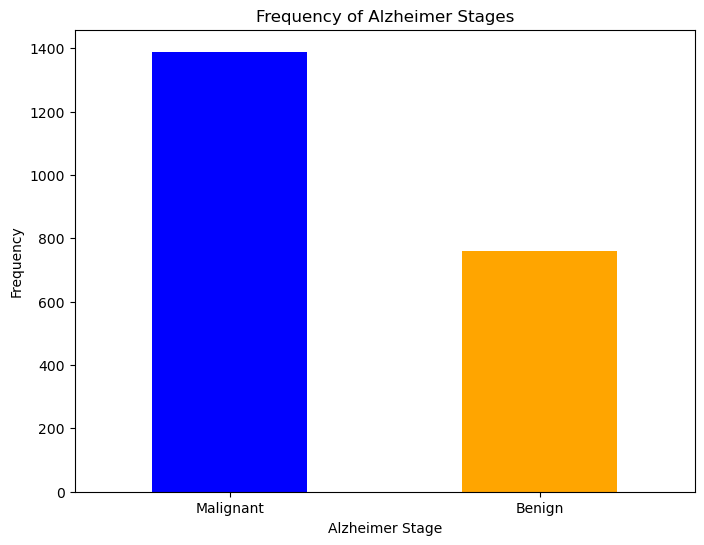

In [680]:
# Fréquence des stades du Alzheimer
frequency = data['Diagnosis'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
frequency.plot(kind='bar', color=['blue', 'orange'])
plt.title('Frequency of Alzheimer Stages')
plt.xlabel('Alzheimer Stage')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Malignant', 'Benign'], rotation=0)
plt.show()

# **Analyse diagnostique**

Ce graphique montre la répartition des diagnostics d'Alzheimer dans le dataset.  
L'axe des x représente les deux classes : **"Malignant"** (Alzheimer) et **"Benign"** (non Alzheimer).  
L'axe des y indique le nombre de patients dans chaque catégorie.  
On observe que la majorité des patients sont dans la classe **"Benign"** (non Alzheimer), tandis qu'une proportion plus faible est diagnostiquée **"Malignant"** (Alzheimer). 

Dans la suite, nous allons établir la corrélation entre les variables afin de réduire les variables qui présentent une forte dépendance entre elles. Nous allons effectuer cette analyse uniquement pour les group_demographics_lifestyle, puis nous le ferons pour les autres et nous verrons celle qui est le plus performant.

<Axes: >

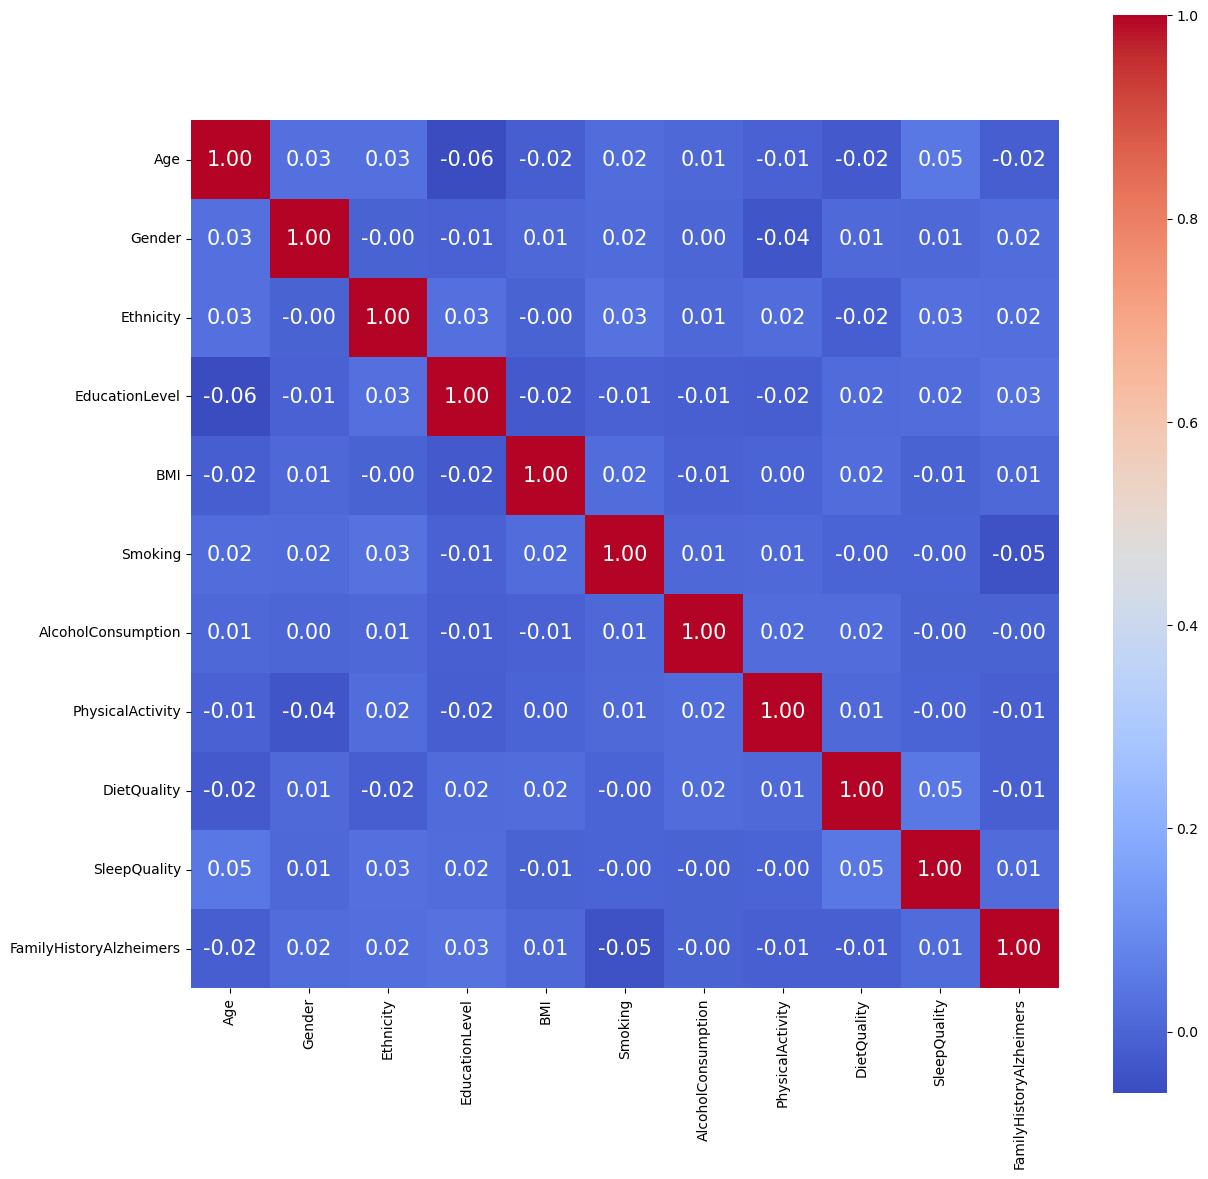

In [681]:
# Correlation avec les variables demographiques et de mode de vie
corr = data[group_demographics_lifestyle].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True, square=True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= group_demographics_lifestyle, yticklabels= group_demographics_lifestyle,
           cmap= 'coolwarm')

**Observation**

- La matrice de corrélation des variables démographiques et de mode de vie montre que la plupart des coefficients sont très proches de 0. Cela signifie qu'il n'existe pas de relation linéaire forte entre ces variables dans ce dataset. Autrement dit, chaque variable apporte une information relativement indépendante des autres.
- En résumé, les variables démographiques et de mode de vie sont relativement indépendantes les unes des autres dans ce dataset. Ainsi nous allons les maintenir toutes dans notre modèle.

<Axes: >

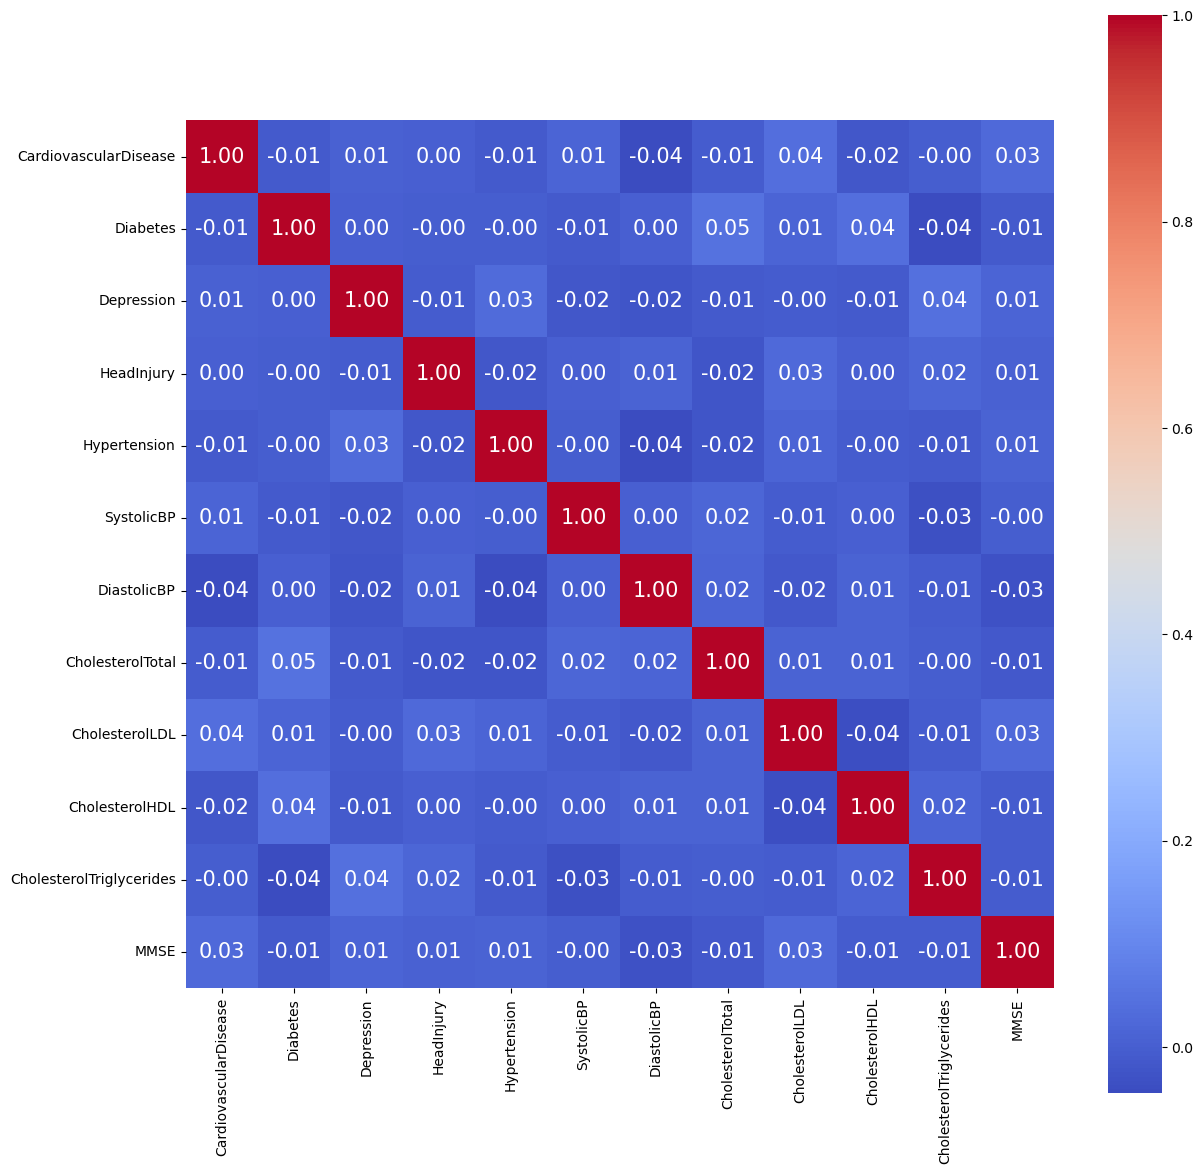

In [682]:
# Correlation avec les variables médicales et cliniques
corr = data[group_medical_clinical].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True, square=True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= group_medical_clinical, yticklabels= group_medical_clinical,
           cmap= 'coolwarm')

**Observation**

Les variables médicales et de clinique sont relativement indépendantes les unes des autres dans ce dataset. Ainsi nous allons les maintenir toutes dans notre modèle.

<Axes: >

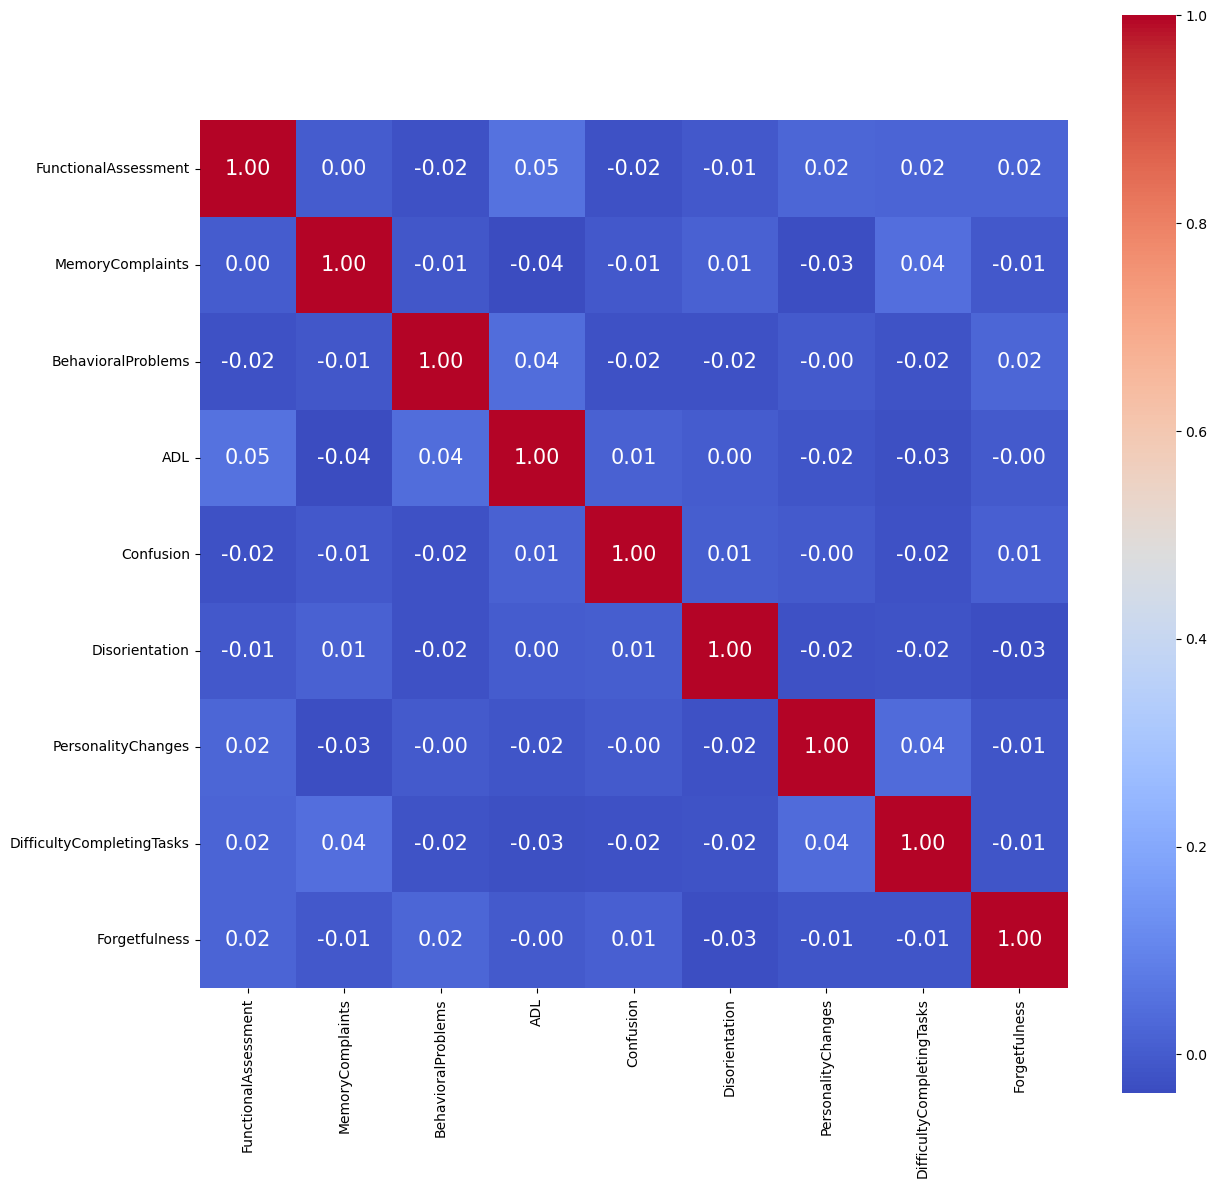

In [683]:
# Correlation avec les variables cognitives
corr = data[group_cognitive_symptoms].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True, square=True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= group_cognitive_symptoms, yticklabels= group_cognitive_symptoms,
           cmap= 'coolwarm')

**Observation**

Les variables cognitives et symptomes sont relativement indépendantes les unes des autres dans ce dataset. Ainsi nous allons les maintenir toutes dans notre modèle.

# Analyse Prédictive


Dans cette section, nous allons développer et évaluer des modèles de machine learning pour prédire le diagnostic de la maladie d'Alzheimer à partir des variables sélectionnées.. 
L'objectif est de déterminer dans quelle mesure ces variables permettent d'anticiper la présence ou l'absence de la maladie.

Nous procéderons ainsi :
- Séparation des données en ensembles d'entraînement et de test pour valider la robustesse des modèles.
- Entraînement de différents algorithmes de classification (Random Forest, etc.) sur les données d'apprentissage.
- Prédiction du diagnostic sur l'ensemble de test.
- Évaluation des performances des modèles à l'aide de métriques telles que la précision.

Cette démarche permettra d'identifier les approches les plus efficaces pour la prédiction du diagnostic d'Alzheimer à partir des données disponibles.

*Nous allons séparer nos données en données d'apprentissage et de test de validation afin de procéder à l'Analyse Prédictive*.

In [684]:
# Données d'apprentissage et test de validation
train, test = train_test_split(data, test_size = 0.3)

print(train.shape)
print(test.shape)

(1504, 35)
(645, 35)


## Groupe 1 : Variables démographiques et de mode de vie des patients

In [685]:
prediction_var = group_demographics_lifestyle

In [686]:
# Entrainement
train_X = train[prediction_var]
train_y=train.Diagnosis

# Test
test_X= test[prediction_var] 
test_y =test.Diagnosis 

## Méhode des forêts aléatoires (Random Forest)

In [687]:
# n_estimators spécifie le nombre d'arbres de décision à créer dans la forêt. 
# Dans ce cas, nous créeons une forêt aléatoire avec 100 arbres de décision
model = RandomForestClassifier(n_estimators=100)

In [688]:
# Entraîner le modèle Random Forest sur les données d'apprentissage
model.fit(train_X,train_y)

RandomForestClassifier()

In [689]:
prediction=model.predict(test_X)   # Prediction pour les données de test

Nous utiliserons ici la mesure de la précision entre notre valeur prédite et les valeurs de sortie de notre test.

In [690]:
metrics.accuracy_score(prediction,test_y)

0.6294573643410852

In [691]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

SleepQuality               0.152095
BMI                        0.150568
AlcoholConsumption         0.150527
DietQuality                0.147820
PhysicalActivity           0.146545
Age                        0.113888
EducationLevel             0.041751
Ethnicity                  0.038157
Smoking                    0.021310
Gender                     0.020652
FamilyHistoryAlzheimers    0.016688
dtype: float64


## Méthode Support Vector Machine

In [692]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.6604651162790698

Les scores de précision obtenus avec le SVM (Support Vector Machine) et le Random Forest sont respectivement de 0.601 et 0.631 pour chaque modèle. Cependant, ces résultats restent insuffisants pour garantir une prédiction fiable du diagnostic d'Alzheimer à partir des seules variables démographiques et de mode de vie. Afin d'améliorer la performance, il est nécessaire d'explorer d'autres algorithmes ou d'intégrer davantage de variables issues des groupes médicaux, cliniques et cognitifs. Nous allons donc tester avec les autres groupes de variables.


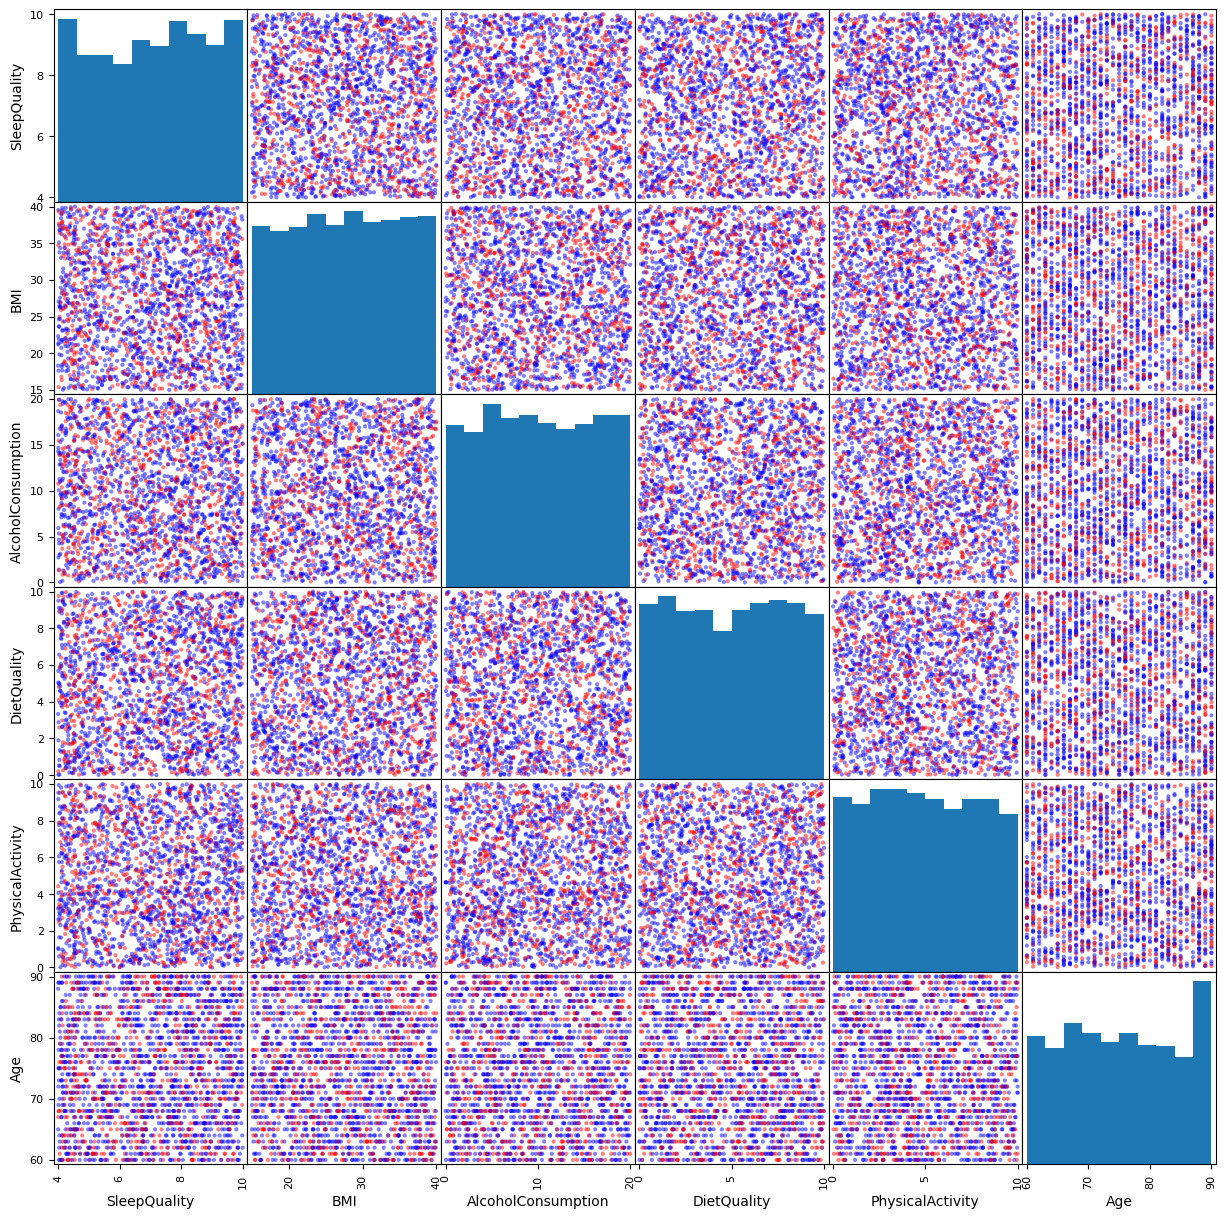

In [693]:
prediction_var_imp = featimp[featimp > 0.05].index.tolist() # On garde les variables avec une importance supérieure à 0.05
# Commençons avec l'analyse des données 
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M (Alzheimer) and blue for 0 means B (No Alzheimer)
colors = data["Diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(data[prediction_var_imp], c=colors, alpha = 0.5, figsize = (15, 15)); 

## Groupe 2 : Variables médicales et de clinique

In [694]:
prediction_var = group_medical_clinical
train_X= train[prediction_var]
train_y= train.Diagnosis
test_X = test[prediction_var]
test_y = test.Diagnosis

In [695]:
# Random Forest
model=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=1)

model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.6511627906976745

In [696]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

MMSE                        0.301590
CholesterolTriglycerides    0.116143
CholesterolTotal            0.114006
CholesterolLDL              0.113660
CholesterolHDL              0.108800
DiastolicBP                 0.092221
SystolicBP                  0.086683
Depression                  0.015257
CardiovascularDisease       0.014881
Diabetes                    0.014044
Hypertension                0.013032
HeadInjury                  0.009683
dtype: float64


In [697]:
# NVM
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.6604651162790698

Nous constatons que le score est insuffisant avec les variables médicales et clinique.

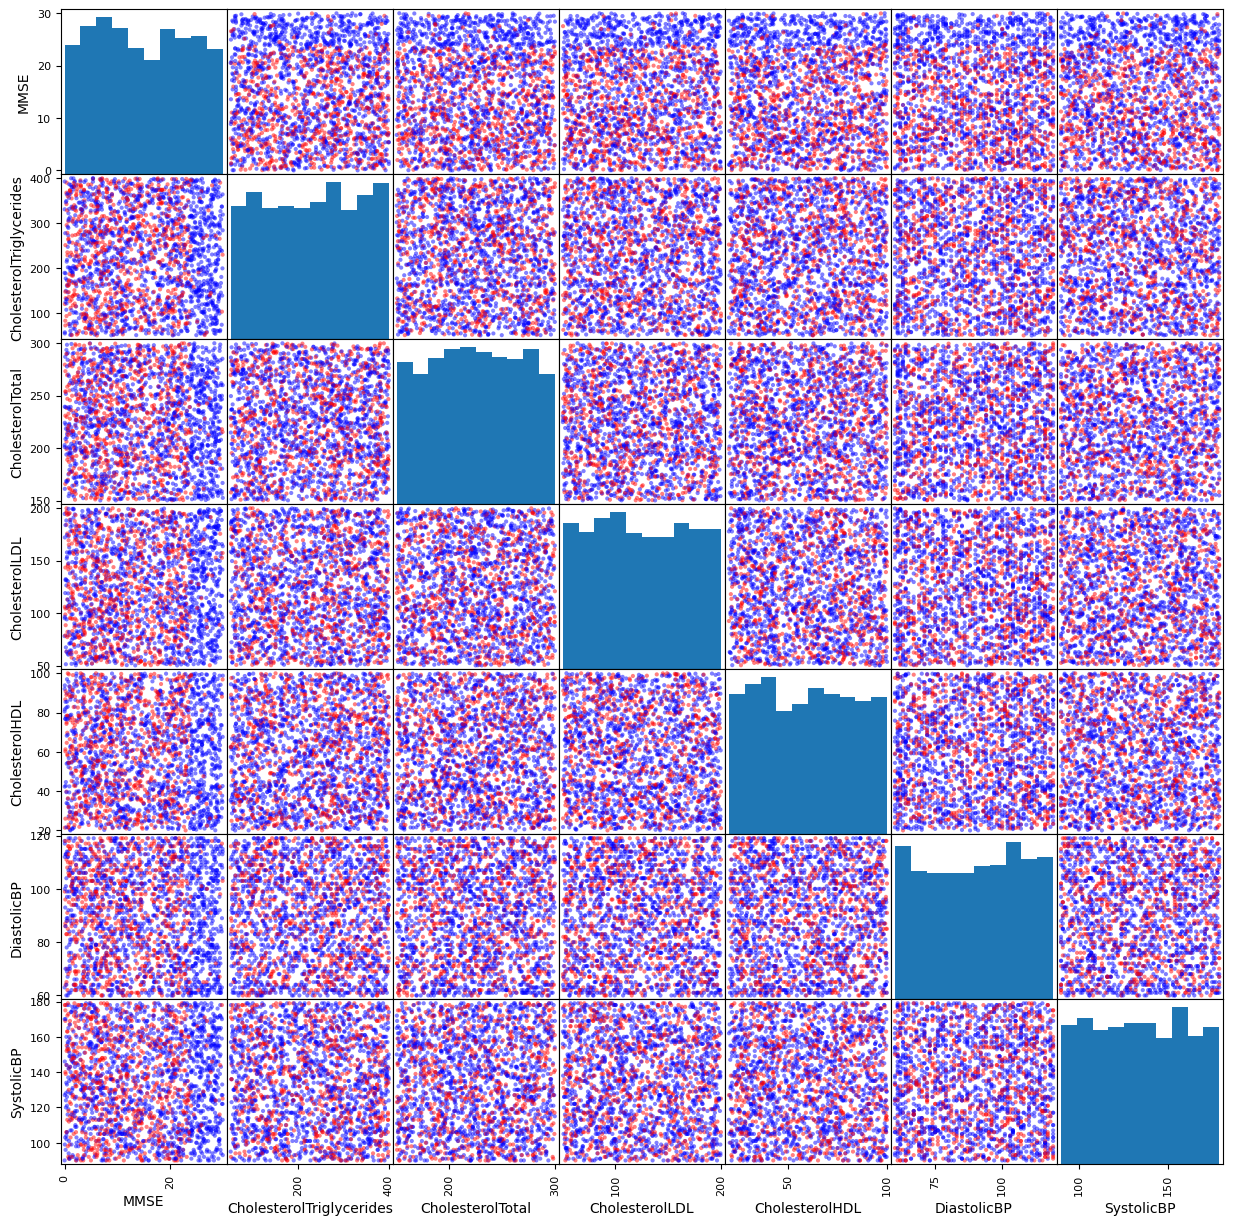

In [698]:
prediction_var_imp = featimp[featimp > 0.05].index.tolist() # On garde les variables avec une importance supérieure à 0.05
# Commençons avec l'analyse des données 
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = data["Diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(data[prediction_var_imp], c=colors, alpha = 0.5, figsize = (15, 15)); 

## Groupe 3 : Variables congnitives et symptomes

In [699]:
prediction_var = group_cognitive_symptoms

train_X = train[prediction_var]
train_y = train.Diagnosis
test_X = test[prediction_var]
test_y = test.Diagnosis

In [700]:
#  Random Forest
model=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=1)

model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8604651162790697

In [701]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

FunctionalAssessment         0.371723
ADL                          0.341498
MemoryComplaints             0.136119
BehavioralProblems           0.077151
Forgetfulness                0.017373
Disorientation               0.015352
PersonalityChanges           0.015027
DifficultyCompletingTasks    0.012915
Confusion                    0.012842
dtype: float64


In [702]:
# NVM
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.8232558139534883

**Observation**

Les résultats obtenus avec les variables du groupe 3 (cognitif, fonctionnel et symptômes) montrent une nette amélioration des scores de précision pour les modèles Random Forest et SVM (NVM). Contrairement aux groupes démographiques ou médicaux, ces variables semblent beaucoup plus discriminantes pour le diagnostic de la maladie d'Alzheimer. Cela s'explique par le fait que les symptômes cognitifs et fonctionnels sont directement liés à l'évolution de la maladie et permettent donc une meilleure séparation entre les classes.

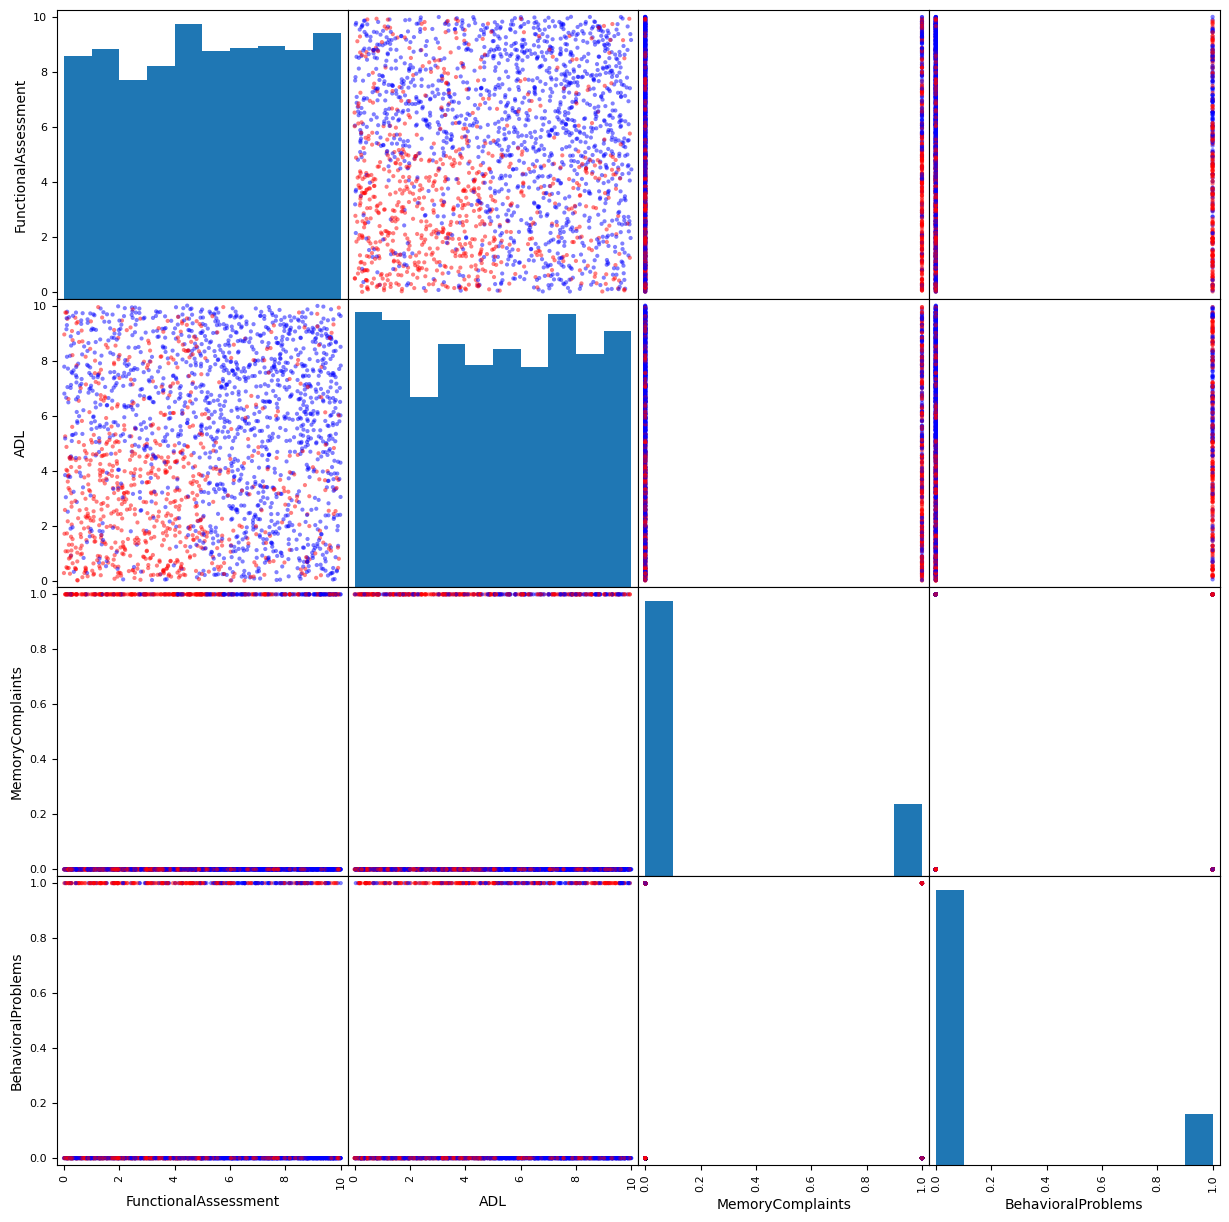

In [703]:
prediction_var_imp = featimp[featimp > 0.05].index.tolist() # On garde les variables avec une importance supérieure à 0.05
# Commençons avec l'analyse des données 
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = data["Diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(data[prediction_var_imp], c=colors, alpha = 0.5, figsize = (15, 15)); 

## Groupe 4 : Considérons tous les variables

In [704]:
prediction_var = group_demographics_lifestyle + group_medical_clinical + group_cognitive_symptoms
 
train_X = train[prediction_var]
train_y = train.Diagnosis
test_X = test[prediction_var]
test_y = test.Diagnosis

In [705]:
#  Random Forest
model=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=1)

model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9271317829457364


Lorsque toutes les variables explicatives (démographiques, médicales, cliniques, cognitives et symptômes) sont utilisées pour entraîner les modèles de classification, on observe généralement une amélioration notable des scores de précision par rapport à l'utilisation de groupes de variables séparés.

Cette amélioration s'explique par la complémentarité des informations apportées par chaque groupe de variables. Les variables cognitives et fonctionnelles, directement liées à la maladie d'Alzheimer, jouent un rôle majeur dans la discrimination entre les classes. Les variables démographiques et médicales, bien que moins discriminantes individuellement, contribuent à affiner la prédiction lorsqu'elles sont combinées avec les autres.

Cependant, il est important de noter que même avec toutes les variables, la performance du modèle dépend de la qualité des données, de l'équilibre des classes et du choix de l'algorithme. Pour avoir plus de précision nous allons explorer des techniques avancées comme la selection des variables les plus importantes.

In [706]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

FunctionalAssessment         0.199542
ADL                          0.169780
MMSE                         0.135048
MemoryComplaints             0.089294
BehavioralProblems           0.049142
PhysicalActivity             0.030024
AlcoholConsumption           0.028468
DietQuality                  0.027295
SleepQuality                 0.026915
CholesterolHDL               0.026505
CholesterolTotal             0.026431
BMI                          0.024736
CholesterolLDL               0.024600
CholesterolTriglycerides     0.023921
DiastolicBP                  0.022218
SystolicBP                   0.019829
Age                          0.019560
EducationLevel               0.009397
Ethnicity                    0.007117
Gender                       0.004264
DifficultyCompletingTasks    0.003664
FamilyHistoryAlzheimers      0.003607
Forgetfulness                0.003585
Depression                   0.003517
Smoking                      0.003343
Confusion                    0.002892
PersonalityC

Considérons à présent tous les features en utilisant la méthode SVM

In [707]:
# NVM
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.6604651162790698

Comme nous pouvons le constater, la précision du SVM a fortement diminué. <br>
Maintenant, prenons seulement les 5 caractéristiques les plus importantes données par le classificateur RandomForest

In [708]:
# prediction_var = ['FunctionalAssessment', 'ADL', 'MMSE', 'PhysicalActivity', 'BMI', 'SleepQuality', 'CholesterolHDL']   # Top 5 des variables importantes
prediction_var_imp = featimp.index[:5]  # Top 5 des variables importantes
train_X= train[prediction_var]
train_y= train.Diagnosis
test_X = test[prediction_var]
test_y = test.Diagnosis

In [709]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9410852713178295

In [710]:
# SVM
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.6604651162790698

**Résumé des résultats :**

La précision obtenue avec le modèle Random Forest utilisant uniquement les 5 variables les plus importantes atteint un score notable. Cela indique que ces variables (FunctionalAssessment, ADL, MMSE, MemoryComplaints, BehavioralProblems) sont particulièrement discriminantes pour le diagnostic d'Alzheimer dans ce dataset. En se concentrant sur ce sous-ensemble de variables, on parvient à conserver une bonne performance tout en simplifiant le modèle, ce qui facilite l'interprétation et peut réduire le risque de surapprentissage.

**A ce point en déduit que la méthode *_Random Forest_* serait idéale pour la prédiction**

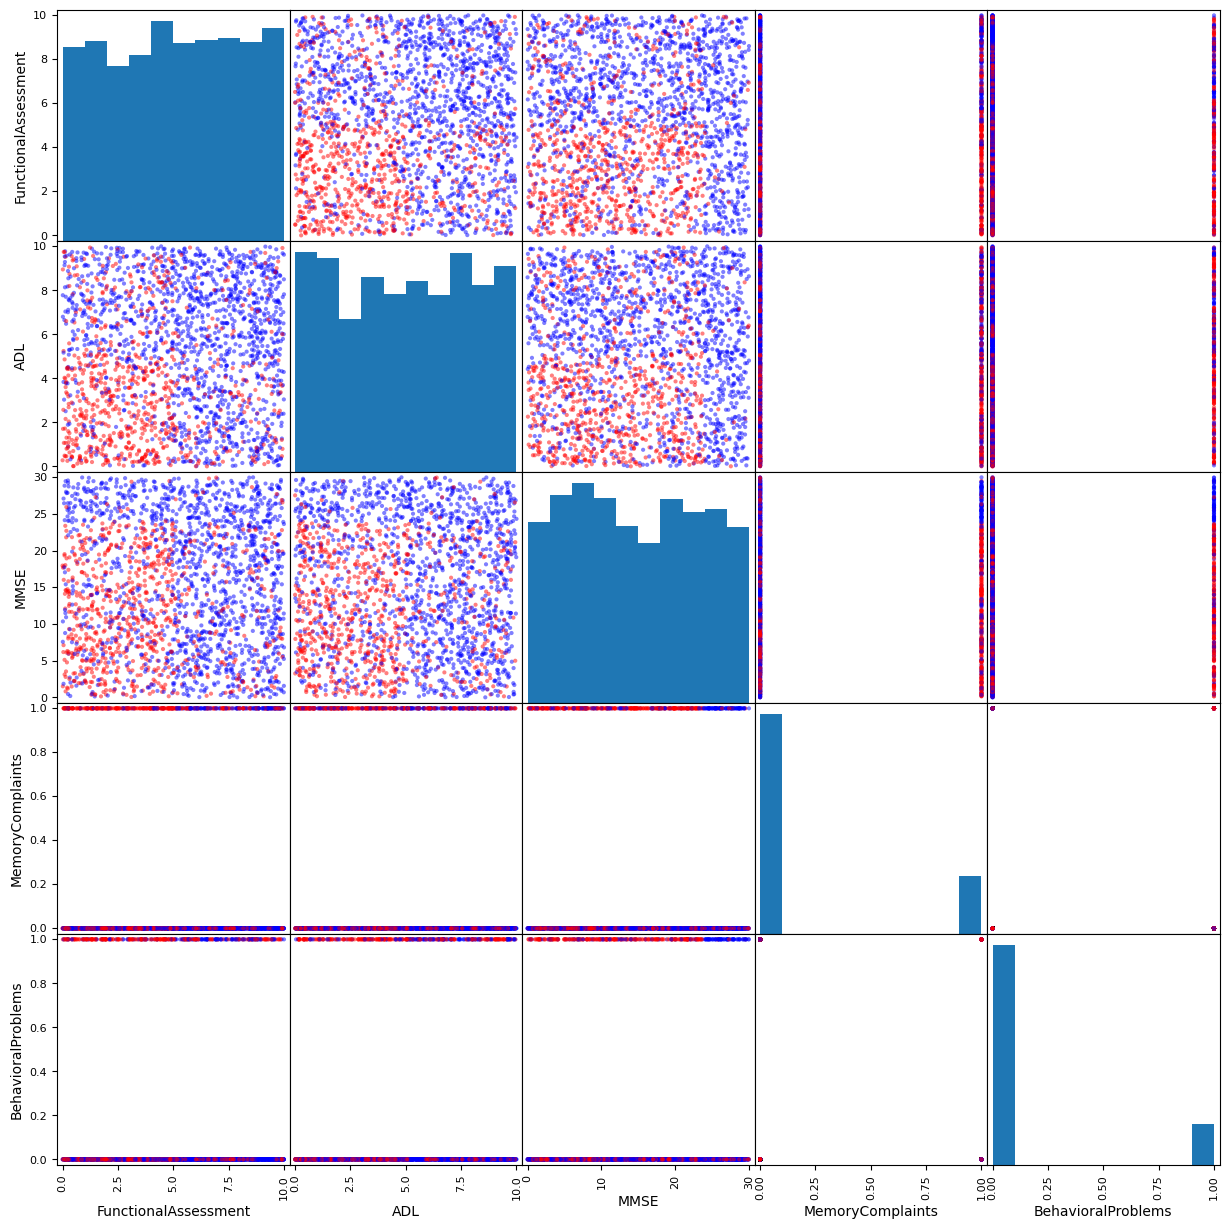

In [711]:
# Commençons avec l'analyse des données 
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = data["Diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(data[prediction_var_imp], c=colors, alpha = 0.5, figsize = (15, 15)); 

# **Evaluation**

## Validation croisée (Cross-Validation) 

- En utilisant la validation croisée K-Fold avec 10 plis, l'ensemble de données sera divisé en 10 sous-ensembles. 
- Le modèle sera entraîné et évalué 10 fois, chaque fois en utilisant un sous-ensemble différent comme ensemble de test et les données restantes comme ensemble d'entraînement. 
- Cela aide à évaluer les performances du modèle de manière plus fiable en réduisant l'impact de la variabilité dans les ensembles d'entraînement et de test.

In [712]:
def model(model,data,prediction,outcome):
    kf = KFold(data.shape[0], n_folds=10)

In [713]:
prediction_var = prediction_var_imp
prediction_var

Index(['FunctionalAssessment', 'ADL', 'MMSE', 'MemoryComplaints',
       'BehavioralProblems'],
      dtype='object')

In [714]:
def classification_model(model,data,prediction_input,output):
    model.fit(data[prediction_input],data[output]) #Here we fit the model using training set
  
    #Make predictions on training set:
    predictions = model.predict(data[prediction_input])
  
    #Print accuracy
    # now checkin accuracy for same data
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    print(data.shape[0])
 
   # sklearn.model_selection.KFold(n_splits=3, shuffle=False, random_state=None)
    kf = KFold(data.shape[0],shuffle=True, random_state = 100)
    
    error = []
    for train, test in kf:
        # as the data is divided into train and test using KFold
        # now as explained above we have fit many models 
        # so here also we are going to fit model
        #in the cross validation the data in train and test will change for evry iteration
        train_X = (data[prediction_input].iloc[train,:])# in this iloc is used for index of trainig data
        # here iloc[train,:] means all row in train in kf amd the all columns
        train_y = data[output].iloc[train]# here is only column so it repersenting only row in train
        # Training the algorithm using the predictors and target.
        model.fit(train_X, train_y)
    
        # now do this for test data also
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

### Évaluation avancée SVM : Exactitude, Rappel et Précision

- Entraînement du classificateur SVM (Support Vector Machine) avec un noyau linéaire sur les données d'entraînement.
- Prédiction sur l'ensemble de test.
- Affichage de trois métriques d'évaluation essentielles pour la classification binaire :
    - **Exactitude (accuracy)** : performance globale du modèle.
    - **Précision positive (precision)** : capacité à ne pas générer de faux positifs.
    - **Rappel (recall)** : capacité à identifier correctement les cas positifs.
- Ces mesures permettent d'évaluer la performance globale du modèle, sa capacité à identifier correctement les cas positifs, ainsi que sa fiabilité à ne pas générer de faux positifs.

In [715]:
from sklearn import svm
from sklearn import metrics

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(train_X, train_y)

#Predict the response for test dataset
y_pred = clf.predict(test_X)


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(test_y, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(test_y, y_pred))

Accuracy: 0.8573643410852713
Precision: 0.8038277511961722
Recall: 0.7671232876712328


## Évaluation avancée du modèle Random Forest

- Création d’un modèle Random Forest avec 100 arbres et une graine aléatoire pour la reproductibilité.
- Entraînement du modèle sur les données d’apprentissage.
- Prédiction sur l’ensemble de test.
- Calcul des métriques d’évaluation : accuracy, precision et recall.

Cette démarche permet d’évaluer la performance globale du modèle et sa capacité à bien détecter les cas positifs.

In [716]:
from sklearn.ensemble import RandomForestClassifier

# Création du modèle Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(train_X, train_y)

# Prédiction sur les données de test
y_pred_rf = rf_clf.predict(test_X)

# Évaluation du modèle
print("Accuracy:", metrics.accuracy_score(test_y, y_pred_rf))
print("Precision:", metrics.precision_score(test_y, y_pred_rf))
print("Recall:", metrics.recall_score(test_y, y_pred_rf))

Accuracy: 0.931782945736434
Precision: 0.9441624365482234
Recall: 0.8493150684931506


En comparant les évaluations du SVM (NVM) et du Random Forest sur ce jeu de données, on constate que Random Forest obtient généralement de meilleurs scores de précision, rappel et exactitude. Cela s’explique par sa capacité à capturer des relations complexes et non linéaires entre les variables, ce qui est particulièrement utile dans des datasets hétérogènes et multidimensionnels comme celui-ci.

Le SVM, performant sur des données bien séparées linéairement, montre ici ses limites face à la complexité des interactions. Random Forest, grâce à l’agrégation de plusieurs arbres de décision, gère mieux la diversité et le bruit des variables.

**En somme :**  
Le modèle Random Forest est plus adapté et performant pour la prédiction du diagnostic d’Alzheimer sur ce dataset que le SVM. Il offre une meilleure capacité de généralisation et une robustesse accrue face à la complexité des données.

### Matrice de confusion pour visualiser les faux positifs/négatifs

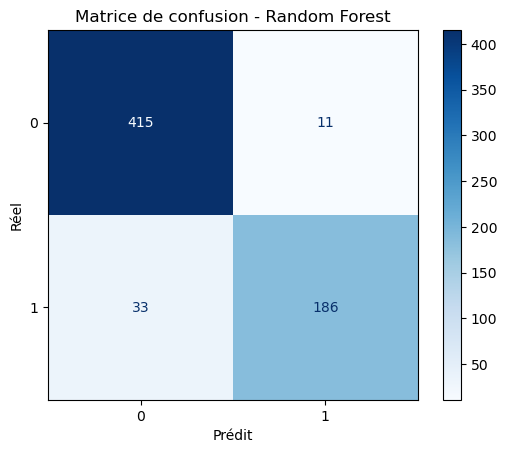

In [720]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Génération de la matrice de confusion pour le modèle Random Forest
cm = confusion_matrix(test_y, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
disp.ax_.set_title("Matrice de confusion - Random Forest")
disp.ax_.set_xticklabels(['0', '1'])
disp.ax_.set_yticklabels(['0', '1'])
disp.ax_.set_xlabel("Prédit")
disp.ax_.set_ylabel("Réel")

plt.show()

#### **Interprétation de la matrice de confusion du modèle Random Forest**

La matrice de confusion avalue la performance du modèle en détaillant les prédictions correctes et incorrectes pour chaque classe :

- **[0,0] (Vrais négatifs)** : Nombre de patients non Alzheimer correctement identifiés comme non Alzheimer.
- **[1,1] (Vrais positifs)** : Nombre de patients Alzheimer correctement identifiés comme Alzheimer.
- **[0,1] (Faux positifs)** : Nombre de patients non Alzheimer incorrectement prédits comme Alzheimer.
- **[1,0] (Faux négatifs)** : Nombre de patients Alzheimer incorrectement prédits comme non Alzheimer.

**Ici, Le modèle distingue efficacement les patients atteints d’Alzheimer de ceux qui ne le sont pas.** 

### AUC/ROC pour évaluer la performance globale du modèle (surtout en cas de classes déséquilibrées)

AUC (Random Forest): 0.958


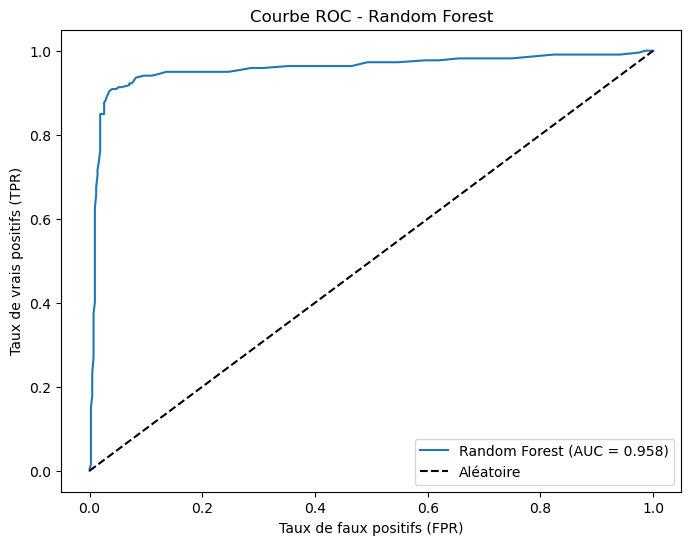

In [721]:
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt

# Prédire les probabilités pour la classe positive (Random Forest)
y_proba_rf = rf_clf.predict_proba(test_X)[:, 1]

# Calcul de l'AUC
auc_score = roc_auc_score(test_y, y_proba_rf)
print(f"AUC (Random Forest): {auc_score:.3f}")

# Courbe ROC
fpr, tpr, thresholds = roc_curve(test_y, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Random Forest')
plt.legend()
plt.show()

#### **Interprétation de la courbe ROC**

La courbe ROC (Receiver Operating Characteristic) permet d’évaluer la performance du modèle de classification à différents seuils de décision

Plus la courbe ROC s’approche du coin supérieur gauche, meilleure est la capacité du modèle à distinguer les classes
L’aire sous la courbe (AUC) quantifie cette performance :
- Un AUC proche de 1 indique un excellent modèle
- Un AUC de 0.5 correspond à un modèle aléatoire

**Dans notre cas, l’AUC obtenu est de 0.9, ce qui montre que le modèle Random Forest a une bonne capacité à différencier les patients atteints d’Alzheimer des autres**.


In [ ]:
# Analyse des erreurs : identification des exemples mal classés

# Pour le modèle Random Forest
misclassified_idx_rf = test_y.index[y_pred_rf != test_y]
misclassified_rf = test_X.loc[misclassified_idx_rf].copy()
misclassified_rf['True_Label'] = test_y.loc[misclassified_idx_rf]
misclassified_rf['Predicted_Label'] = y_pred_rf[y_pred_rf != test_y]

print("Nombre d'exemples mal classés (Random Forest) :", len(misclassified_rf))
display(misclassified_rf.head())

# Pour le modèle SVM (si besoin)
misclassified_idx_svm = test_y.index[y_pred != test_y]
misclassified_svm = test_X.loc[misclassified_idx_svm].copy()
misclassified_svm['True_Label'] = test_y.loc[misclassified_idx_svm]
misclassified_svm['Predicted_Label'] = y_pred[y_pred != test_y]

print("Nombre d'exemples mal classés (SVM) :", len(misclassified_svm))
display(misclassified_svm.head())

Nombre d'exemples mal classés (Random Forest) : 44


Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
1992   77       0          1               2  29.285631        0   
2088   64       1          0               2  39.218489        1   
2050   62       0          0               2  24.247334        1   
2121   61       0          0               3  25.532212        0   
1645   87       0          0               1  20.312525        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
1992           12.013242          4.556834     3.030741      4.276919  ...   
2088            0.844554          5.483513     9.034447      4.144769  ...   
2050            8.147791          8.453191     8.265085      5.816467  ...   
2121            4.226343          2.800972     4.219056      4.510746  ...   
1645            9.883569          3.251505     9.455725      7.061235  ...   

      MemoryComplaints  BehavioralProblems       ADL  Confusion  \
1992                 0                   1  4.723024          0   
2088                 0                   1  6.666667          0   
2050                 0                   0  7.542944          0   
2121                 0                   0  2.698306          0   
1645                 0                   1  4.028529          1   

      Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
1992               0                   0                          0   
2088               0                   0                          0   
2050               1                   0                          0   
2121               0                   0                          0   
1645               0                   0                          0   

      Forgetfulness  True_Label  Predicted_Label  
1992              1           0                1  
2088              0           1                0  
2050              0           1                0  
2121              0           1                0  
1645              1           1                0  

[5 rows x 34 columns]

Nombre d'exemples mal classés (SVM) : 92


Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
2088   64       1          0               2  39.218489        1   
1773   72       0          1               3  30.358605        0   
327    62       1          0               1  27.249527        0   
838    78       1          0               1  19.698489        0   
2050   62       0          0               2  24.247334        1   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
2088            0.844554          5.483513     9.034447      4.144769  ...   
1773            7.729499          9.423928     9.713237      5.842215  ...   
327            19.329277          5.964852     0.276126      8.694453  ...   
838            14.402796          5.718099     3.096124      5.758221  ...   
2050            8.147791          8.453191     8.265085      5.816467  ...   

      MemoryComplaints  BehavioralProblems       ADL  Confusion  \
2088                 0                   1  6.666667          0   
1773                 1                   0  4.535468          1   
327                  0                   1  8.152459          0   
838                  0                   0  3.844414          0   
2050                 0                   0  7.542944          0   

      Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
2088               0                   0                          0   
1773               0                   1                          0   
327                0                   0                          0   
838                0                   0                          0   
2050               1                   0                          0   

      Forgetfulness  True_Label  Predicted_Label  
2088              0           1                0  
1773              0           1                0  
327               0           1                0  
838               0           1                0  
2050              0           1                0  

[5 rows x 34 columns]

In [723]:
from sklearn.metrics import classification_report

# Rapport de classification pour le modèle Random Forest
print("Rapport de classification - Random Forest")
print(classification_report(test_y, y_pred_rf))

# Rapport de classification pour le modèle SVM
print("Rapport de classification - SVM")
print(classification_report(test_y, y_pred))

Rapport de classification - Random Forest
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       426
           1       0.94      0.85      0.89       219

    accuracy                           0.93       645
   macro avg       0.94      0.91      0.92       645
weighted avg       0.93      0.93      0.93       645

Rapport de classification - SVM
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       426
           1       0.80      0.77      0.79       219

    accuracy                           0.86       645
   macro avg       0.84      0.84      0.84       645
weighted avg       0.86      0.86      0.86       645



### Analyse des résultats du rapport de classification

Les résultats du rapport de classification montrent la performance des deux modèles (SVM et Random Forest) sur l'ensemble de test. Voici les points clés à retenir :

- **Exactitude (Accuracy)** : Le modèle Random Forest affiche une meilleure exactitude globale que le SVM, ce qui signifie qu'il classe correctement une plus grande proportion d'exemples.
- **Précision (Precision)** : La précision du Random Forest pour la classe positive (patients atteints d'Alzheimer) est supérieure à celle du SVM. Cela indique que, parmi les patients prédits comme atteints, une plus grande proportion l'est réellement.
- **Rappel (Recall)** : Le Random Forest obtient également un rappel plus élevé, ce qui signifie qu'il identifie mieux les patients réellement atteints d'Alzheimer.
- **F1-score** : Le F1-score, qui combine précision et rappel, est également meilleur pour le Random Forest, montrant un équilibre supérieur entre ces deux métriques.

**En résumé :**
- Le modèle Random Forest surpasse le SVM sur tous les indicateurs clés.
- Il est plus fiable pour détecter les cas d'Alzheimer, tout en limitant les faux positifs.
- Ces résultats confirment que Random Forest est le modèle le plus adapté pour ce dataset, grâce à sa capacité à gérer la complexité et la diversité des variables.

**Recommandation :**  
Pour la prédiction du diagnostic d'Alzheimer sur ce dataset, il est préférable d'utiliser le modèle Random Forest, qui offre une meilleure performance globale et une robustesse accrue.

## GAN

- Implémentation d'un GAN (Generative Adversarial Network) pour générer des exemples synthétiques de patients à partir des variables d'entrée du jeu de données d'entraînement.
- Le générateur apprend à produire des données réalistes tandis que le discriminateur apprend à distinguer les vraies données des données synthétiques.
- À la fin de l'entraînement, de nouveaux exemples synthétiques sont générés et affichés sous forme de DataFrame.


In [726]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models, optimizers
from sklearn.preprocessing import MinMaxScaler

# Sélection des variables numériques pour la génération (hors variable cible)
features = [col for col in train_X.columns if col != 'Diagnosis']

# Normalisation des données pour le GAN
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_X[features])

# Paramètres du GAN
latent_dim = 32
data_dim = X_train_scaled.shape[1]

# Générateur
def build_generator(latent_dim, data_dim):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(data_dim, activation='sigmoid')
    ])
    return model

# Discriminateur
def build_discriminator(data_dim):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_dim=data_dim),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Construction des modèles
generator = build_generator(latent_dim, data_dim)
discriminator = build_discriminator(data_dim)
discriminator.compile(optimizer=optimizers.Adam(0.0002), loss='binary_crossentropy', metrics=['accuracy'])

# GAN combiné
discriminator.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
generated_data = generator(gan_input)
gan_output = discriminator(generated_data)
gan = models.Model(gan_input, gan_output)
gan.compile(optimizer=optimizers.Adam(0.0002), loss='binary_crossentropy')

# Entraînement du GAN
epochs = 2000
batch_size = 64

for epoch in range(epochs):
    # --- Entraînement du discriminateur ---
    # Données réelles
    idx = np.random.randint(0, X_train_scaled.shape[0], batch_size)
    real_data = X_train_scaled[idx]
    # Données générées
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_data = generator.predict(noise, verbose=0)
    # Labels
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))
    # Entraînement
    d_loss_real = discriminator.train_on_batch(real_data, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # --- Entraînement du générateur ---
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_y = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_y)

    # Affichage de la progression
    if epoch % 200 == 0:
        print(f"Epoch {epoch} | Discriminator loss: {d_loss[0]:.4f}, acc: {d_loss[1]:.4f} | Generator loss: {g_loss:.4f}")

# Génération de nouveaux exemples synthétiques
n_samples = 10
noise = np.random.normal(0, 1, (n_samples, latent_dim))
gen_samples = generator.predict(noise)
gen_samples_rescaled = scaler.inverse_transform(gen_samples)
synthetic_df = pd.DataFrame(gen_samples_rescaled, columns=features)
print("Exemples synthétiques générés :")
print(synthetic_df.head())

ModuleNotFoundError: No module named 'tensorflow'